In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("trips_extracted.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df.head()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
0,795.0,2.7,5.05,True,2
1,164.0,0.8,5.00,True,1
2,334.0,1.0,7.55,False,1
3,1136.0,6.1,15.00,False,1
4,900.0,5.7,12.55,False,1


## Mean values for the columns

In [5]:
df[["DURATION", "DISTANCE", "FARE"]].mean()

DURATION    1862.212698
DISTANCE      12.821664
FARE          26.466543
dtype: float64

## Median values for the columns

In [6]:
df[["DURATION", "DISTANCE", "FARE"]].median()

DURATION    1718.00
DISTANCE      11.00
FARE          22.55
dtype: float64

## Standard Deviation values for the columns

In [7]:
df[["DURATION", "DISTANCE", "FARE"]].std()

DURATION    1032.978988
DISTANCE      10.049958
FARE          17.544505
dtype: float64

## Pearson correlation coefficient (p)

**For two set of data points X and Y,**

**p = 1 => Linear relationship (as X increases, Y increases)**

**p = -1 => Inverse relationsip (as X increases, Y decreases)**

**p = 0 => No relationship between X and Y**

*p>0 & p<1 => gives how strong the linear relationship is based on nearness to 1.*

*p<0 & p>-1 => gives how strong the inverse relationship is based on nearness to -1.*

In [8]:
df[["DURATION", "DISTANCE", "FARE"]].corr()

,DURATION,DISTANCE,FARE
DURATION,1.000000,0.700337,0.618619
DISTANCE,0.700337,1.000000,0.793750
FARE,0.618619,0.793750,1.000000


## Random sampling of the data (100k records)

In [9]:
random_sample = df.sample(100000, random_state=7)

In [10]:
random_sample

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
96567546,1289.0,3.3,7.50,True,4
43695397,3512.0,19.1,40.15,False,1
14171178,1013.0,2.3,5.05,True,2
28042869,999.0,3.3,15.35,False,1
5528805,2072.0,7.4,7.50,True,4
...,...,...,...,...,...
67757785,4255.0,14.9,40.05,False,1
87521511,2485.0,16.4,38.05,False,1
10463356,1745.0,8.1,12.50,True,2
82271666,927.0,5.6,23.55,False,1


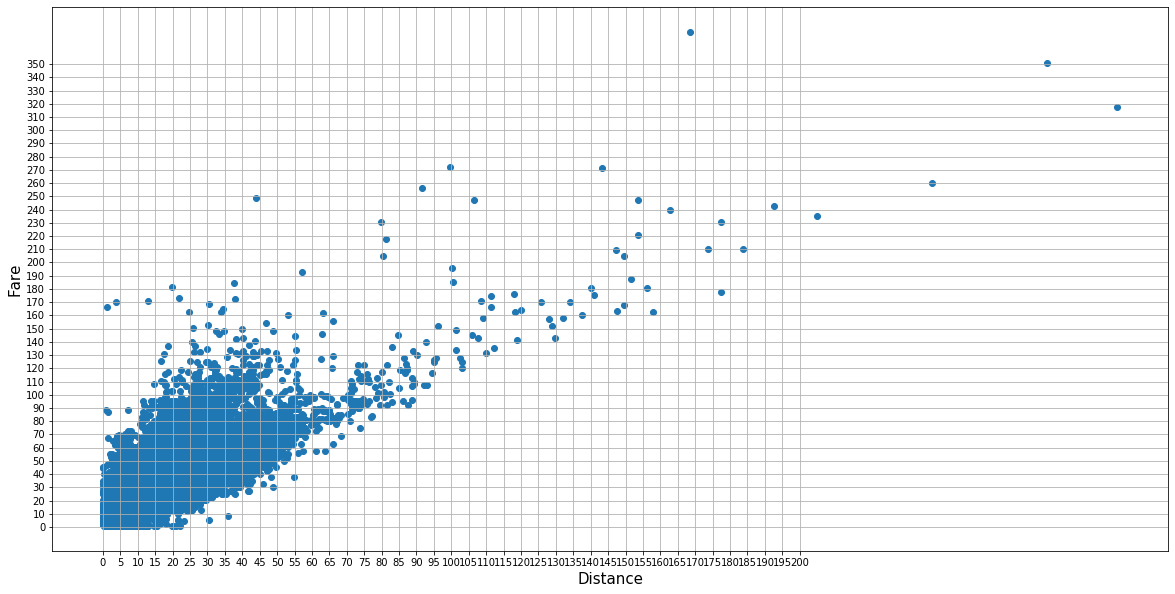

In [11]:
plt.figure(figsize=[20,10])
plt.scatter("DISTANCE", "FARE", data=random_sample)
plt.grid(True)
plt.xlabel('Distance', fontsize=15)
plt.ylabel('Fare', fontsize=15)
plt.xticks(np.arange(0, 201, 5))
plt.yticks(np.arange(0, 353, 10))
plt.show()

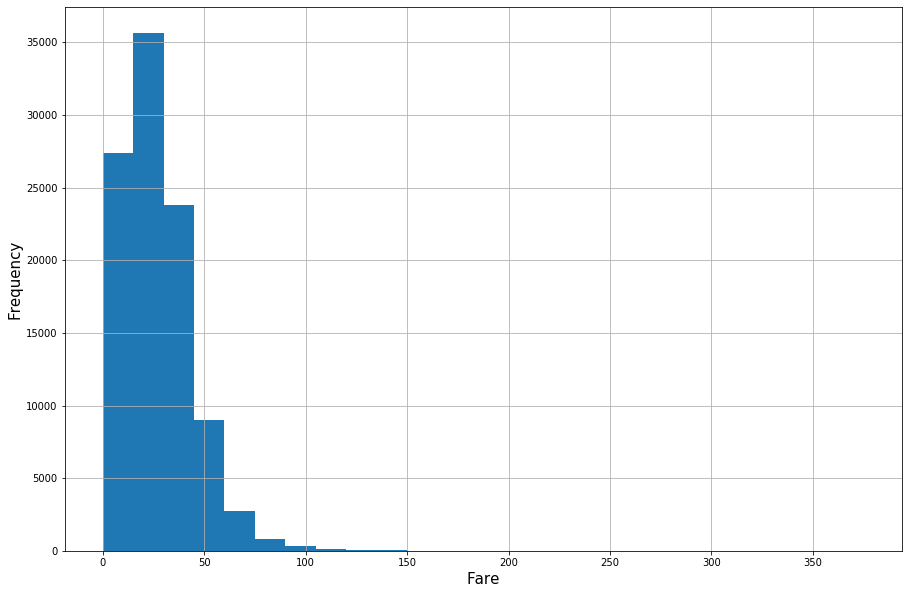

In [12]:
plt.figure(figsize=[15, 10])
plt.hist(random_sample.FARE, bins=np.arange(0, np.max(random_sample.FARE) + 1, 15))
plt.grid(True)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [13]:
random_sample.mean()

DURATION        1868.102420
DISTANCE          12.825625
FARE              26.486304
IS_POOLED          0.356600
TRIPS_POOLED       1.548350
dtype: float64

In [14]:
random_sample.std()

DURATION        1021.718208
DISTANCE           9.962944
FARE              17.304638
IS_POOLED          0.478998
TRIPS_POOLED       1.103293
dtype: float64

## Outlier Detection & Removal using naive method

In [15]:
fare_mean = random_sample.FARE.mean()
fare_stdv = random_sample.FARE.std()
print(f"Fare_Mean: {fare_mean}")
print(f"Fare_Stdv: {fare_stdv}")
threshold = 3 * fare_stdv
lower_bound, upper_bound = 0, fare_mean + threshold
print(f"Threshold: {threshold}")
print(f"Lower Boundary: {lower_bound}")
print(f"Upper Boundary: {upper_bound}")

Fare_Mean: 26.486303866666425
Fare_Stdv: 17.304637969958602
Threshold: 51.9139139098758
Lower Boundary: 0
Upper Boundary: 78.40021777654223


In [16]:
random_sample[random_sample.FARE > upper_bound]

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
65586234,3311.0,18.5,82.55,False,1
89282956,6259.0,60.4,84.90,False,1
61854276,4156.0,44.3,130.25,False,1
98197449,2003.0,26.2,82.10,False,1
51601265,2770.0,16.8,90.35,False,1
...,...,...,...,...,...
32701452,6766.0,51.3,92.55,False,1
28661955,3103.0,27.1,88.60,False,1
90466932,2787.0,29.1,90.10,False,1
27266388,3430.0,26.5,78.60,False,1


**1111 Trips are outliers in the sample**

## Outlier Detection and Removal using z-score

In [17]:
from scipy import stats

In [18]:
random_sample[np.abs(stats.zscore(random_sample.FARE)) > 3]

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
65586234,3311.0,18.5,82.55,False,1
89282956,6259.0,60.4,84.90,False,1
61854276,4156.0,44.3,130.25,False,1
98197449,2003.0,26.2,82.10,False,1
51601265,2770.0,16.8,90.35,False,1
...,...,...,...,...,...
32701452,6766.0,51.3,92.55,False,1
28661955,3103.0,27.1,88.60,False,1
90466932,2787.0,29.1,90.10,False,1
27266388,3430.0,26.5,78.60,False,1


**1111 Trips are outliers in the sample**

-------------------------------------

## Scaling and removing outliers from a larger sample (10 million) using z-score

In [19]:
sample = df.sample(10000000, random_state=7)

In [20]:
fare_mean = sample.FARE.mean()
fare_stdv = sample.FARE.std()
print(f"Fare_Mean: {fare_mean}")
print(f"Fare_Stdv: {fare_stdv}")
threshold = 3 * fare_stdv
lower_bound, upper_bound = 0, fare_mean + threshold
print(f"Threshold: {threshold}")
print(f"Lower Boundary: {lower_bound}")
print(f"Upper Boundary: {upper_bound}")

Fare_Mean: 26.4718555158903
Fare_Stdv: 17.556430036994403
Threshold: 52.66929011098321
Lower Boundary: 0
Upper Boundary: 79.14114562687351


In [21]:
sample[(np.abs(stats.zscore(sample[["DURATION", "DISTANCE", "FARE"]])) > 3).all(axis=1)]

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
89282956,6259.0,60.4,84.90,False,1
76802411,5050.0,43.2,132.65,False,1
44027232,5620.0,78.5,97.40,False,1
25397670,6004.0,67.9,82.60,True,1
45339830,7081.0,87.5,92.55,False,1
...,...,...,...,...,...
27643536,6196.0,55.8,95.35,False,1
4515402,7182.0,111.7,138.65,False,1
46716434,5860.0,63.3,113.65,False,1
74133349,10356.0,169.7,197.50,False,1


**18,036 trips are outliers in the 10M sample**

In [22]:
normalized = sample[(np.abs(stats.zscore(sample[["DURATION", "DISTANCE", "FARE"]])) < 3).all(axis=1)]

In [23]:
normalized

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
96567546,1289.0,3.3,7.50,True,4
43695397,3512.0,19.1,40.15,False,1
14171178,1013.0,2.3,5.05,True,2
28042869,999.0,3.3,15.35,False,1
5528805,2072.0,7.4,7.50,True,4
...,...,...,...,...,...
776634,1340.0,12.1,20.05,False,1
45044420,3288.0,27.0,62.78,False,1
18849953,1414.0,16.7,61.80,False,1
1574309,2354.0,7.6,12.55,True,5


In [24]:
normalized.mean()

DURATION        1800.637247
DISTANCE          12.183728
FARE              25.205745
IS_POOLED          0.363716
TRIPS_POOLED       1.561116
dtype: float64

In [25]:
normalized.std()

DURATION        916.178169
DISTANCE          8.506358
FARE             14.792799
IS_POOLED         0.481068
TRIPS_POOLED      1.109100
dtype: float64

In [26]:
normalized.corr()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
DURATION,1.000000,0.685990,0.583127,-0.040922,-0.017548
DISTANCE,0.685990,1.000000,0.775190,-0.206517,-0.207722
FARE,0.583127,0.775190,1.000000,-0.524661,-0.437489
IS_POOLED,-0.040922,-0.206517,-0.524661,1.000000,0.657153
TRIPS_POOLED,-0.017548,-0.207722,-0.437489,0.657153,1.000000


In [27]:
print("Fare  ->", normalized.FARE.min(), normalized.FARE.max())
print("Duration  ->", normalized.DURATION.min(), normalized.DURATION.max())
print("Distance  ->", normalized.DISTANCE.min(), normalized.DISTANCE.max())

Fare  -> 0.0 79.14
Duration  -> 0.0 4962.0
Distance  -> 0.0 42.9


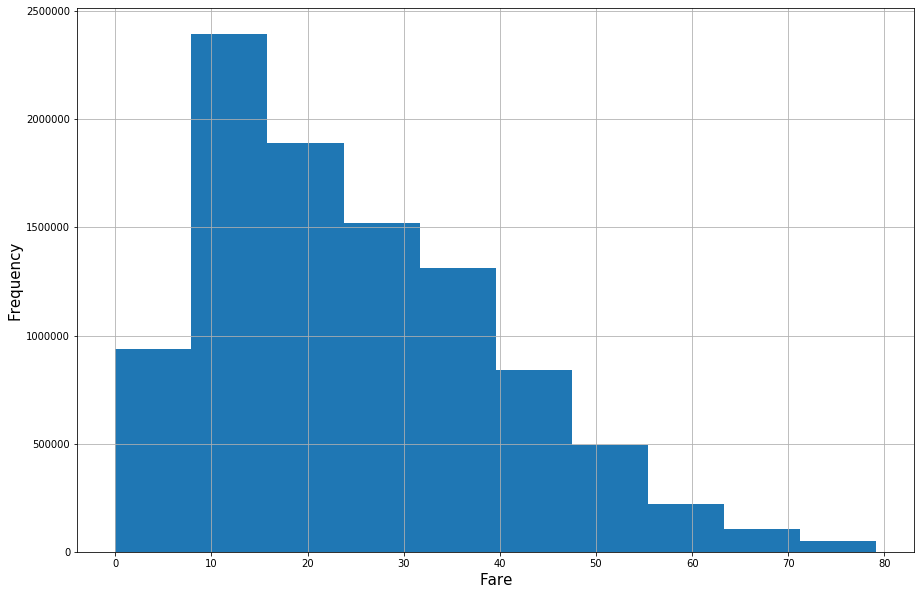

In [28]:
plt.figure(figsize=[15, 10])
plt.hist(normalized.FARE)
plt.grid(True)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

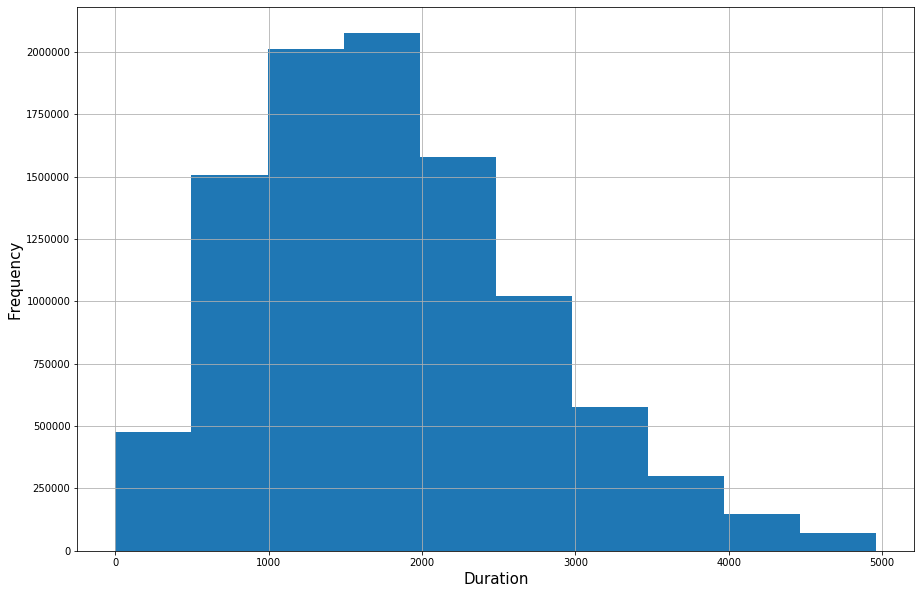

In [29]:
plt.figure(figsize=[15, 10])
plt.hist(normalized.DURATION)
plt.grid(True)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

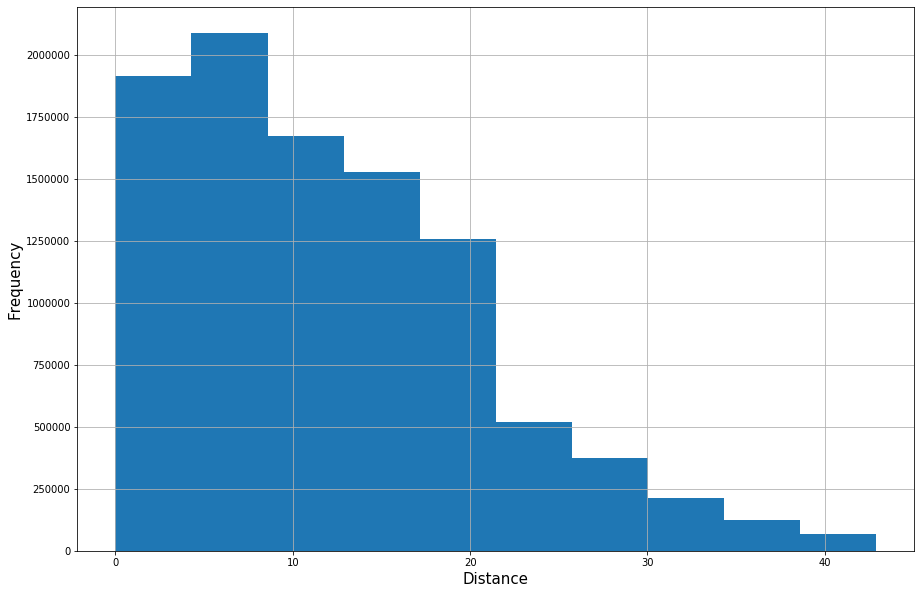

In [50]:
plt.figure(figsize=[15, 10])
plt.hist(normalized.DISTANCE)
plt.grid(True)
plt.xlabel('Distance', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

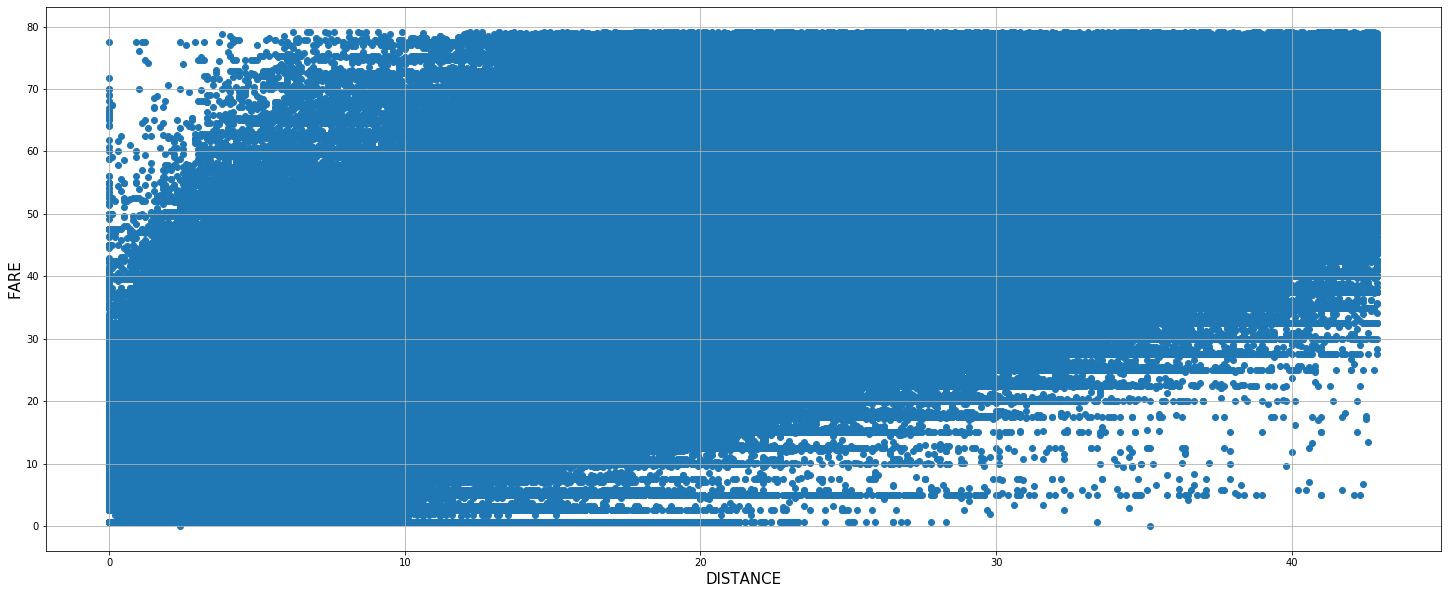

In [34]:
plt.figure(figsize=[25, 10])
plt.scatter("DISTANCE", "FARE", data=normalized)
plt.grid(True)
plt.xlabel('DISTANCE', fontsize=15)
plt.ylabel('FARE', fontsize=15)
plt.show()

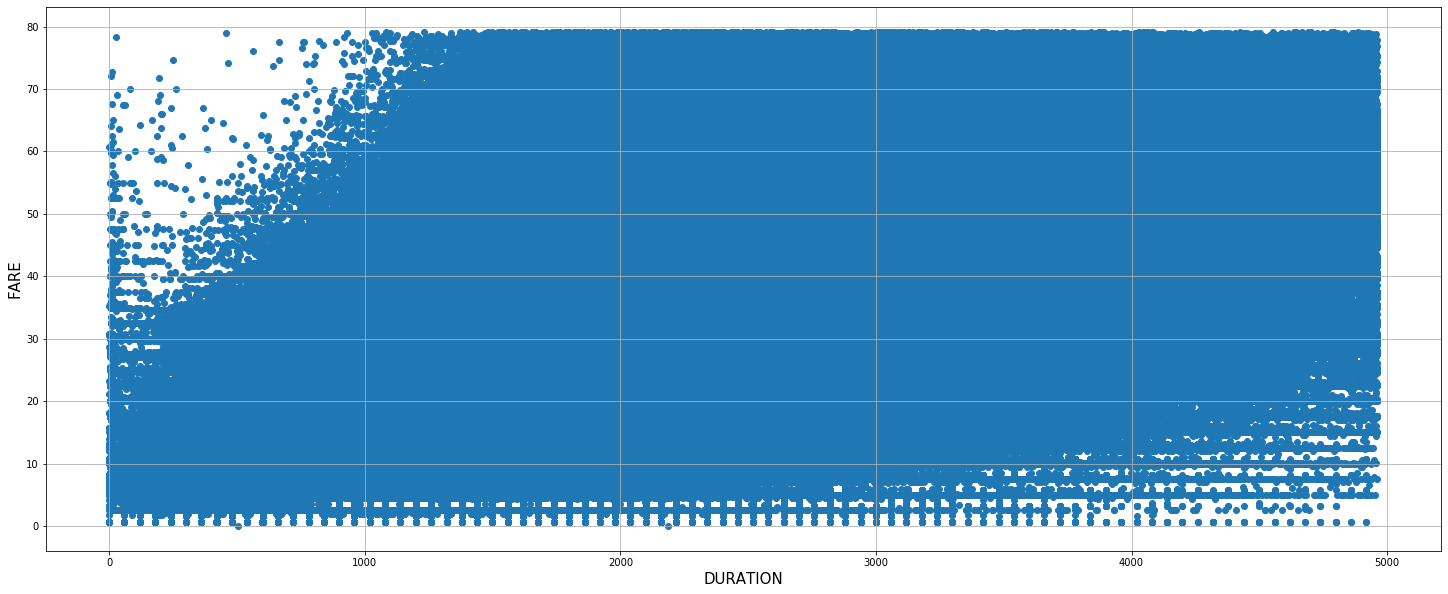

In [35]:
plt.figure(figsize=[25, 10])
plt.scatter("DURATION", "FARE", data=normalized)
plt.grid(True)
plt.xlabel('DURATION', fontsize=15)
plt.ylabel('FARE', fontsize=15)
plt.show()

In [36]:
normalized.to_csv("trips_normalized.csv", index=False)

In [61]:
random_sample = normalized.sample(500, random_state=7)

In [62]:
random_sample.mean()

DURATION        1822.70600
DISTANCE          12.43660
FARE              25.75546
IS_POOLED          0.36000
TRIPS_POOLED       1.55400
dtype: float64

In [63]:
random_sample.std()

DURATION        900.336710
DISTANCE          8.224042
FARE             14.887334
IS_POOLED         0.480481
TRIPS_POOLED      1.117848
dtype: float64

In [65]:
random_sample.corr()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
DURATION,1.000000,0.687516,0.594883,-0.114688,-0.044277
DISTANCE,0.687516,1.000000,0.754896,-0.253418,-0.216078
FARE,0.594883,0.754896,1.000000,-0.568603,-0.458815
IS_POOLED,-0.114688,-0.253418,-0.568603,1.000000,0.650262
TRIPS_POOLED,-0.044277,-0.216078,-0.458815,0.650262,1.000000


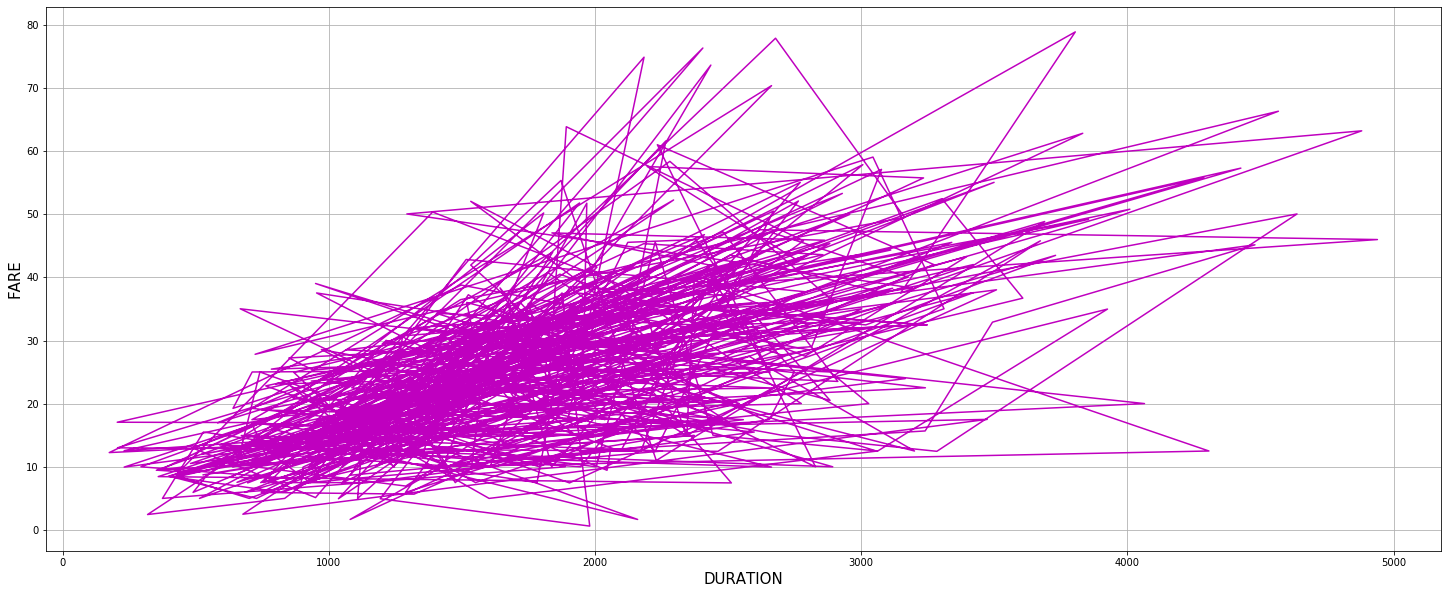

In [66]:
plt.figure(figsize=[25, 10])
plt.plot("DURATION", "FARE", data=random_sample, color="m")
plt.grid(True)
plt.xlabel('DURATION', fontsize=15)
plt.ylabel('FARE', fontsize=15)
plt.show()

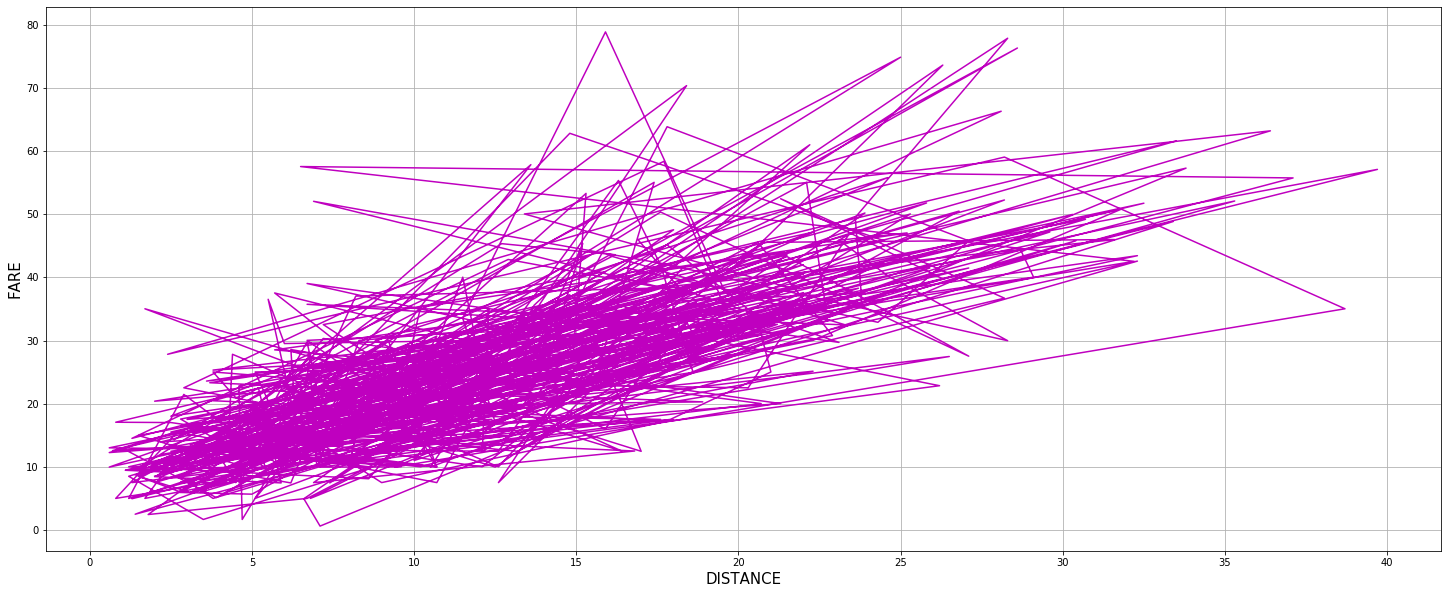

In [67]:
plt.figure(figsize=[25, 10])
plt.plot("DISTANCE", "FARE", data=random_sample, color="m")
plt.grid(True)
plt.xlabel('DISTANCE', fontsize=15)
plt.ylabel('FARE', fontsize=15)
plt.show()